<a href="https://colab.research.google.com/github/Zahra-Asghari/Zahra-Asghari.github.io/blob/master/w2v_on_nycdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Dataset size: 312
TRAIN size: 218
TEST size: 94


2021-08-29 16:58:31,488 : INFO : collecting all words and their counts
2021-08-29 16:58:31,490 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-08-29 16:58:31,576 : INFO : collected 4001 word types from a corpus of 467517 raw words and 9135 sentences
2021-08-29 16:58:31,578 : INFO : Loading a fresh vocabulary
2021-08-29 16:58:31,594 : INFO : effective_min_count=10 retains 2454 unique words (61% of original 4001, drops 1547)
2021-08-29 16:58:31,597 : INFO : effective_min_count=10 leaves 463491 word corpus (99% of original 467517, drops 4026)
2021-08-29 16:58:31,608 : INFO : deleting the raw counts dictionary of 4001 items
2021-08-29 16:58:31,610 : INFO : sample=0.001 downsamples 52 most-common words
2021-08-29 16:58:31,612 : INFO : downsampling leaves estimated 436426 word corpus (94.2% of prior 463491)
2021-08-29 16:58:31,622 : INFO : estimated required memory for 2454 words and 100 dimensions: 3190200 bytes
2021-08-29 16:58:31,624 : INFO : resetting laye

Vocab size 2454


2021-08-29 16:58:32,716 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-08-29 16:58:32,741 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-08-29 16:58:32,745 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-08-29 16:58:32,747 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-08-29 16:58:32,761 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-08-29 16:58:32,765 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-08-29 16:58:32,775 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-08-29 16:58:32,781 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-08-29 16:58:32,782 : INFO : EPOCH - 1 : training on 467517 raw words (436603 effective words) took 0.6s, 711761 effective words/s
2021-08-29 16:58:33,348 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-08-29 16:58:33,352 : INFO : worker thread

Total words 2269
x_train (9135, 100)
y_train (9135, 3)

x_test (94, 100)
y_test (94, 3)
(2269, 100)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          226900    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 100, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 303       
Total params: 307,603
Trainable params: 80,703
Non-trainable params: 226,900
_________________________________________________________________
Epoch 1/5
115/115 [==============================] - 30s 238ms/step - loss: 0.6106 - accuracy: 0.7567 - val_loss: 0.7379 - val_accuracy: 0.6

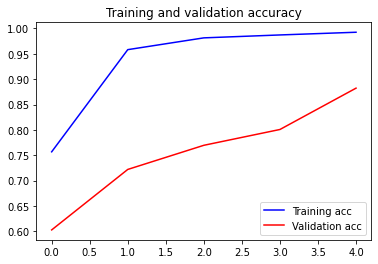

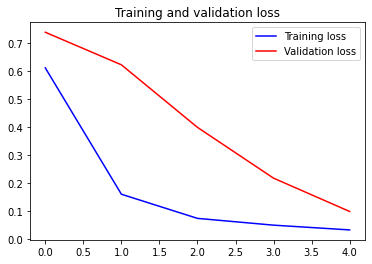

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          226900    
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 96, 100)           50100     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 100)               0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 400)               40400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 400)             

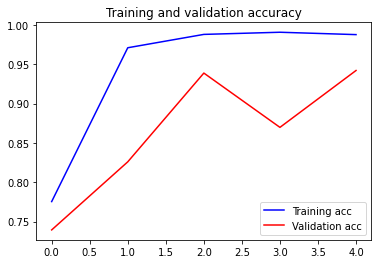

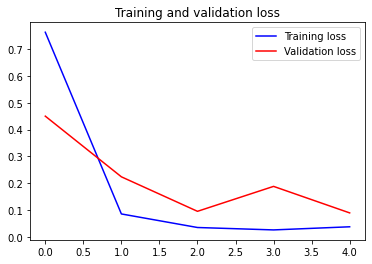

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          226900    
_________________________________________________________________
gru_6 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 303       
Total params: 287,803
Trainable params: 60,903
Non-trainable params: 226,900
_________________________________________________________________
Epoch 1/5
115/115 [==============================] - 27s 215ms/step - loss: 0.5022 - accuracy: 0.8057 - val_loss: 1.2631 - val_accuracy: 0.4893
Epoch 2/5
115/115 [==============================] - 24s 212ms/step - loss: 0.1418 - accuracy: 0.9641 - val_loss: 0.9341 - val_accuracy: 0.6393
Epoch 3/5
115/115 [==============================] - 24s 211ms/step - loss: 0.0622 -

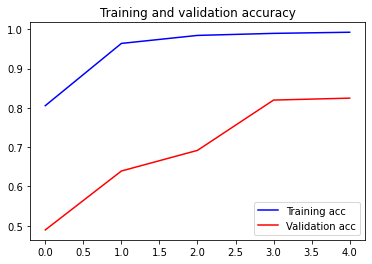

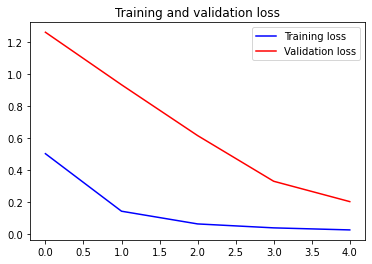

In [ ]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,f1_score,recall_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM,GlobalMaxPooling1D,GRU,SpatialDropout1D
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from nltk.tokenize import word_tokenize
# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import wordnet
wordnet.synsets("subscribe")

from collections import OrderedDict



nltk.download('stopwords')

# DATASET
DATASET_COLUMNS = ["ThreadID", "rcontent", "Class" ]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.7

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC
W2V_SIZE = 100
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 100
EPOCHS = 5
BATCH_SIZE = 64


# EXPORT

WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

df=pd.read_excel('NYC2.xlsx')

print("Dataset size:", len(df))

df.head(5)



stop_words = stopwords.words("english")
stemmer = PorterStemmer()

def preprocess(text, stem=True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

#AGUMENTATION####
def find_synonyms(word):
  synonyms = []
  for synset in wordnet.synsets(word):
    for syn in synset.lemma_names():
      synonyms.append(syn)

  # using this to drop duplicates while maintaining word order (closest synonyms comes first)
  synonyms_without_duplicates = list(OrderedDict.fromkeys(synonyms))
  return synonyms_without_duplicates

def create_set_of_new_sentences(sentence, max_syn_per_word = 3):
  new_sentences = []
  for word in word_tokenize(sentence):
    if len(word)<=3 : continue
    for synonym in find_synonyms(word)[0:max_syn_per_word]:
      synonym = synonym.replace('_', ' ') #restore space character
      new_sentence = sentence.replace(word,synonym)
      new_sentences.append(new_sentence)
  return new_sentences

def data_augment_synonym_replacement(data, column='subject'):
  generated_data = pd.DataFrame([], columns=data.columns)
  for index in data.index:
    text_to_augment = data[column][index]
    for generated_sentence in create_set_of_new_sentences(text_to_augment):
      new_entry =  data.loc[[index]]
      new_entry[column] = generated_sentence
      generated_data=generated_data.append(new_entry)

  generated_data_df = generated_data.drop_duplicates()
  augmented_data= pd.concat([data.loc[:],generated_data_df], ignore_index=True)
  return augmented_data
#AGUMENTATION#####


df.rcontent = df.rcontent.apply(lambda x: preprocess(x))

df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=30)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))
data_augment_synonym_replacement(df,column='rcontent')
df_train1=df_train.append(data_augment_synonym_replacement(df,column='rcontent'))

# Word2Vec
documents = [_text.split() for _text in df_train1.rcontent]

w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE,
                                            window=W2V_WINDOW,
                                            min_count=W2V_MIN_COUNT,
                                            workers=8)
w2v_model.build_vocab(documents)

words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)
text=df['rcontent'].values
#Tokenize Text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

X_train = pad_sequences(tokenizer.texts_to_sequences(df_train1.rcontent), maxlen=SEQUENCE_LENGTH)
X_test = pad_sequences(tokenizer.texts_to_sequences(df_test.rcontent), maxlen=SEQUENCE_LENGTH)

Y_train= pd.get_dummies(df_train1.Class).values
Y_test= pd.get_dummies(df_test.Class).values



print("x_train", X_train.shape)
print("y_train", Y_train.shape)
print()
print("x_test", X_test.shape)
print("y_test", Y_test.shape)



#Embedding layer
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False)

model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.25, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=2),
              EarlyStopping(monitor='val_accuracy',mode='max', min_delta=1, patience=2)]
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                     validation_split=0.2,
                    verbose=1)



score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

losst, accuracyt = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}",accuracyt)

y_pred = np.argmax(model.predict(X_test),axis=1)

y_test_arg=np.argmax(Y_test,axis=1)
precision = precision_score(y_test_arg,y_pred,average='macro')

print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg,y_pred,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg,y_pred,average='macro')
print('F1 score: %f' % f1)




acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model1 = Sequential()

model1.add(embedding_layer)
model1.add(Dropout(0.25))

model1.add(Conv1D(100,
                 5,
                 padding='valid',
                 activation='relu',
                 strides=1))

model1.add(GlobalMaxPooling1D())
model1.add(Flatten())

model1.add(Dense(400))
model1.add(Dropout(0.25))
model1.add(Activation('relu'))
model1.add(Dense(3))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()

history1=model1.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=1)


score1 = model1.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score1[1])
print("LOSS:",score1[0])


y_pred1 = np.argmax(model1.predict(X_test),axis=1)

y_test_arg1=np.argmax(Y_test,axis=1)
precision = precision_score(y_test_arg1,y_pred1,average='macro')

print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg1,y_pred1,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg1,y_pred1,average='macro')
print('F1 score: %f' % f1)

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



model2 = Sequential()
model2.add(embedding_layer)
#model2.add(Dropout(0.5))
model2.add(GRU(100, dropout=0.25, recurrent_dropout=0.2))
model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks1 = [ ReduceLROnPlateau(monitor='val_loss', patience=3),
              EarlyStopping(monitor='val_accuracy',mode='max', min_delta=1, patience=3)]


model2.summary()

history2 = model2.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=1
                    )

score2 = model2.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score2[1])
print("LOSS:",score2[0])

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

y_pred2 = np.argmax(model2.predict(X_test),axis=1)

y_test_arg2=np.argmax(Y_test,axis=1)
precision = precision_score(y_test_arg2,y_pred2,average='macro')

print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg2,y_pred2,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg2,y_pred2,average='macro')
print('F1 score: %f' % f1)

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Dataset size: 312


2021-09-01 10:48:41,750 : INFO : collecting all words and their counts
2021-09-01 10:48:41,754 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-01 10:48:41,759 : INFO : collected 1898 word types from a corpus of 6319 raw words and 218 sentences
2021-09-01 10:48:41,761 : INFO : Loading a fresh vocabulary
2021-09-01 10:48:41,764 : INFO : effective_min_count=10 retains 126 unique words (6% of original 1898, drops 1772)
2021-09-01 10:48:41,767 : INFO : effective_min_count=10 leaves 2423 word corpus (38% of original 6319, drops 3896)
2021-09-01 10:48:41,770 : INFO : deleting the raw counts dictionary of 1898 items
2021-09-01 10:48:41,772 : INFO : sample=0.001 downsamples 126 most-common words
2021-09-01 10:48:41,774 : INFO : downsampling leaves estimated 1137 word corpus (46.9% of prior 2423)
2021-09-01 10:48:41,776 : INFO : estimated required memory for 126 words and 200 dimensions: 264600 bytes
2021-09-01 10:48:41,778 : INFO : resetting layer weights
2021

TRAIN size: 218
TEST size: 94
Vocab size 126


2021-09-01 10:48:41,951 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-09-01 10:48:41,952 : INFO : worker thread finished; awaiting finish of 5 more threads
2021-09-01 10:48:41,953 : INFO : worker thread finished; awaiting finish of 4 more threads
2021-09-01 10:48:41,954 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-09-01 10:48:41,955 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-09-01 10:48:41,958 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-09-01 10:48:41,960 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-09-01 10:48:41,967 : INFO : EPOCH - 4 : training on 6319 raw words (1118 effective words) took 0.0s, 48572 effective words/s
2021-09-01 10:48:41,989 : INFO : worker thread finished; awaiting finish of 7 more threads
2021-09-01 10:48:41,993 : INFO : worker thread finished; awaiting finish of 6 more threads
2021-09-01 10:48:41,996 : INFO : worker thread fini

Total words 2269
x_train (218, 100)
y_train (218, 3)

x_test (94, 100)
y_test (94, 3)
(2269, 200)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 200)          453800    
_________________________________________________________________
dense (Dense)                (None, 100, 10)           2010      
_________________________________________________________________
lstm (LSTM)                  (None, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 456,683
Trainable params: 2,883
Non-trainable params: 453,800
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 8s 61ms/step - loss: 1.0701 - accuracy: 0.3908 - val_loss: 1.0551 - val_accuracy: 0.3636
Epoch

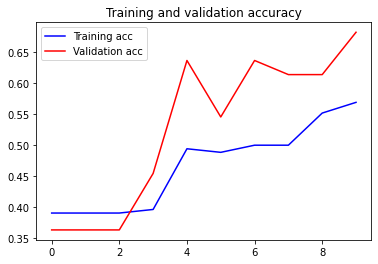

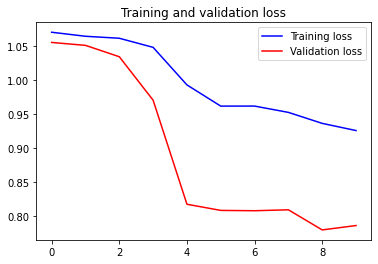

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 200)          453800    
_________________________________________________________________
dropout (Dropout)            (None, 100, 200)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 64)            64064     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

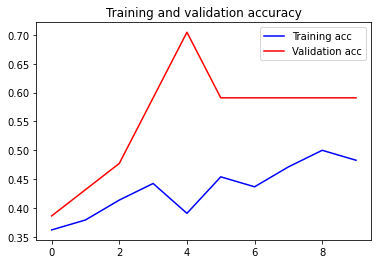

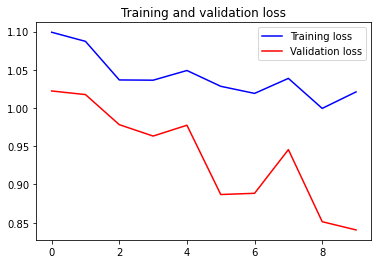

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 200)          453800    
_________________________________________________________________
gru (GRU)                    (None, 10)                6360      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 460,193
Trainable params: 6,393
Non-trainable params: 453,800
_________________________________________________________________
Epoch 1/5
87/87 [==============================] - 7s 61ms/step - loss: 1.0809 - accuracy: 0.3448 - val_loss: 1.0848 - val_accuracy: 0.3636
Epoch 2/5
87/87 [==============================] - 5s 56ms/step - loss: 1.0716 - accuracy: 0.3908 - val_loss: 1.0799 - val_accuracy: 0.3636
Epoch 3/5
87/87 [==============================] - 5s 57ms/step - loss: 1.0735 - accuracy: 0.3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


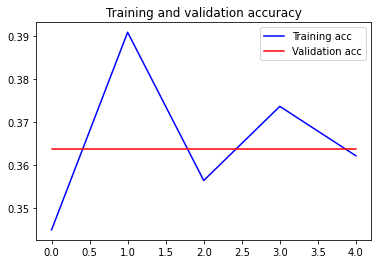

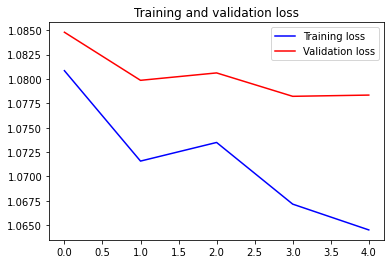

In [ ]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM,GlobalMaxPooling1D,GRU,SpatialDropout1D
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from nltk.tokenize import word_tokenize
# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

from keras.regularizers import l2

nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import wordnet
wordnet.synsets("subscribe")

from collections import OrderedDict

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

nltk.download('stopwords')

# DATASET
DATASET_COLUMNS = ["ThreadID", "rcontent", "Class" ]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.7

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC
W2V_SIZE = 200
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 100
EPOCHS = 10
BATCH_SIZE = 2


# EXPORT

WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

df=pd.read_excel('NYC2.xlsx')

print("Dataset size:", len(df))

df.head(5)


stop_words = stopwords.words("english")
stemmer = PorterStemmer()

def preprocess(text, stem=True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

#AGUMENTATION####
def find_synonyms(word):
  synonyms = []
  for synset in wordnet.synsets(word):
    for syn in synset.lemma_names():
      synonyms.append(syn)

  # using this to drop duplicates while maintaining word order (closest synonyms comes first)
  synonyms_without_duplicates = list(OrderedDict.fromkeys(synonyms))
  return synonyms_without_duplicates

def create_set_of_new_sentences(sentence, max_syn_per_word = 3):
  new_sentences = []
  for word in word_tokenize(sentence):
    if len(word)<=3 : continue
    for synonym in find_synonyms(word)[0:max_syn_per_word]:
      synonym = synonym.replace('_', ' ') #restore space character
      new_sentence = sentence.replace(word,synonym)
      new_sentences.append(new_sentence)
  return new_sentences

def data_augment_synonym_replacement(data, column='subject'):
  generated_data = pd.DataFrame([], columns=data.columns)
  for index in data.index:
    text_to_augment = data[column][index]
    for generated_sentence in create_set_of_new_sentences(text_to_augment):
      new_entry =  data.loc[[index]]
      new_entry[column] = generated_sentence
      generated_data=generated_data.append(new_entry)

  generated_data_df = generated_data.drop_duplicates()
  augmented_data= pd.concat([data.loc[:],generated_data_df], ignore_index=True)
  return augmented_data
#AGUMENTATION#####


df.rcontent = df.rcontent.apply(lambda x: preprocess(x))

df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=50)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

'''data_augment_synonym_replacement(df,column='rcontent')
df_train1=df_train.append(data_augment_synonym_replacement(df,column='rcontent')) '''

# Word2Vec
documents = [_text.split() for _text in df_train.rcontent]

w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE,
                                            window=W2V_WINDOW,
                                            min_count=W2V_MIN_COUNT,
                                            workers=8)
w2v_model.build_vocab(documents)

words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)
text=df['rcontent'].values
#Tokenize Text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

X_train = pad_sequences(tokenizer.texts_to_sequences(df_train.rcontent), maxlen=SEQUENCE_LENGTH)
X_test = pad_sequences(tokenizer.texts_to_sequences(df_test.rcontent), maxlen=SEQUENCE_LENGTH)

Y_train= pd.get_dummies(df_train.Class).values
Y_test= pd.get_dummies(df_test.Class).values



print("x_train", X_train.shape)
print("y_train", Y_train.shape)
print()
print("x_test", X_test.shape)
print("y_test", Y_test.shape)



#Embedding layer
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False)

model = Sequential()
model.add(embedding_layer)

model.add(Dense(10, activation='relu'))
#model.add(SpatialDropout1D(0.2))
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=3),
              EarlyStopping(monitor='val_accuracy',mode='max', min_delta=1, patience=3)]

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                     validation_split=0.2,
                    verbose=1)



score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

target_names = ['class 1', 'class 2', 'class 3']
y_pred1 = np.argmax(model.predict(X_test),axis=1)

y_test_arg1=np.argmax(Y_test,axis=1)
print(classification_report(y_test_arg1, y_pred1,target_names=target_names))
'''precision = precision_score(y_test_arg1,y_pred1,average='macro')

print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg1,y_pred1,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg1,y_pred1,average='macro')
print('F1 score: %f' % f1)'''



losst, accuracyt = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}",accuracyt)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model1 = Sequential()

model1.add(embedding_layer)
model1.add(Dropout(0.25))

model1.add(Conv1D(64,
                 5,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model1.add(GlobalMaxPooling1D())
model1.add(Flatten())
# We add a vanilla hidden layer:

model1.add(Dense(100))
model1.add(Dropout(0.5))
model1.add(Activation('relu'))
model1.add(Dense(3))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()

history1=model1.fit(X_train, Y_train,
                    batch_size=2,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)




score1 = model1.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score1[1])
print("LOSS:",score1[0])


acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']


y_pred2 = np.argmax(model1.predict(X_test),axis=1)

y_test_arg2=np.argmax(Y_test,axis=1)
print(classification_report(y_test_arg2, y_pred2,target_names=target_names))
'''precision = precision_score(y_test_arg2,y_pred2,average='macro')

print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg2,y_pred2,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg2,y_pred2,average='macro')
print('F1 score: %f' % f1)'''


epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



model2 = Sequential()
model2.add(embedding_layer)

model2.add(GRU(10, dropout=0.5, recurrent_dropout=0.25))

model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=2),
              EarlyStopping(monitor='val_accuracy',mode='max', min_delta=1, patience=2)]


model2.summary()

history2 = model2.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=5,
                    validation_split=0.2,
                    verbose=1
                    )

score2 = model2.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score2[1])
print("LOSS:",score2[0])

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']


y_pred3 = np.argmax(model2.predict(X_test),axis=1)

y_test_arg3=np.argmax(Y_test,axis=1)
print(classification_report(y_test_arg3, y_pred3,target_names=target_names))
'''precision = precision_score(y_test_arg3,y_pred3,average='macro')

print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg3,y_pred3,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg3,y_pred3,average='macro')
print('F1 score: %f' % f1)'''


epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()